<a href="https://colab.research.google.com/github/lakshyaa04/20B81A6652/blob/main/mini_project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score
import warnings



1146015
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1146015 entries, 0 to 1146014
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1146015 non-null  int64  
 1   type            1146015 non-null  object 
 2   amount          1146015 non-null  float64
 3   nameOrig        1146015 non-null  object 
 4   oldbalanceOrg   1146014 non-null  float64
 5   newbalanceOrig  1146014 non-null  float64
 6   nameDest        1146014 non-null  object 
 7   oldbalanceDest  1146014 non-null  float64
 8   newbalanceDest  1146014 non-null  float64
 9   isFraud         1146014 non-null  float64
 10  isFlaggedFraud  1146014 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 96.2+ MB
Null Values = True


' co-relation matrix to check multicolinearity between variables '

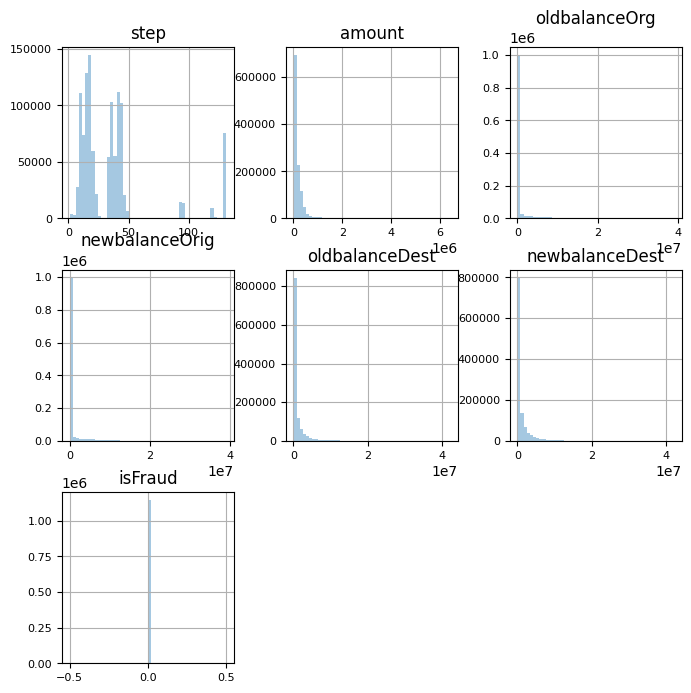

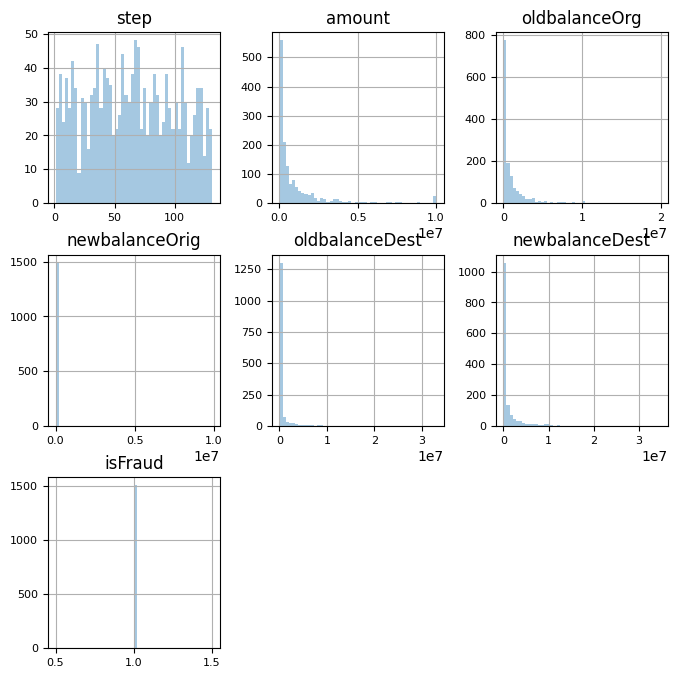

In [ ]:
df = pd.read_csv("/content/Money_laundry_dataset.csv")
print(len(df))
warnings.filterwarnings('ignore')
df.head()
df.info()
df.describe()
'''Checking for any null values'''
print('Null Values =',df.isnull().values.any())
'''removing the unwanted features'''
df.drop('nameOrig', axis=1, inplace=True)
df.drop('nameDest', axis=1, inplace=True)
df.drop('isFlaggedFraud', axis=1, inplace=True)
''' Visualising the variables by grouping them by class '''
df.groupby('isFraud').hist(figsize=(8, 8), bins=50, xlabelsize=8, ylabelsize=8,alpha=0.4)
''' co-relation matrix to check multicolinearity between variables '''


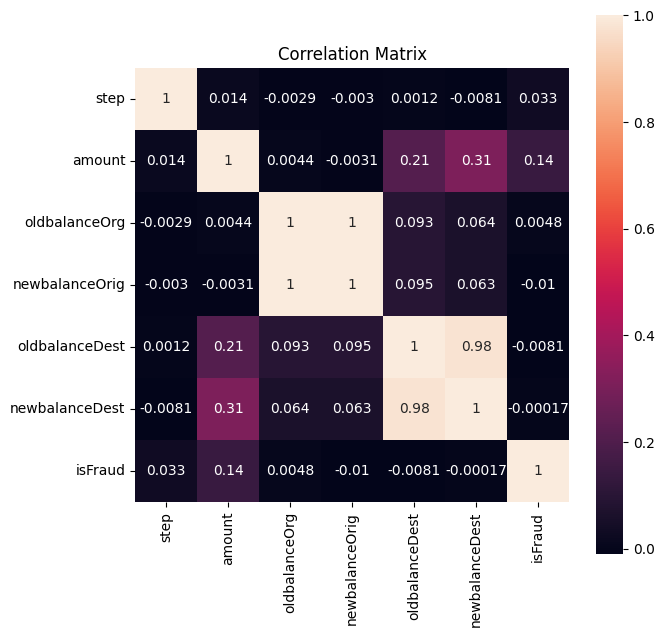

In [ ]:
correlation = df.corr()
plt.figure(figsize=(7,7))
25
plt.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True)
#creating dummy variables for categorical values
dum = pd.get_dummies(df['type'])
df1 = pd.concat([df,dum],axis=1)
df1.drop(['type'],axis=1, inplace=True)


0.0    19980
1.0       20
Name: isFraud, dtype: int64


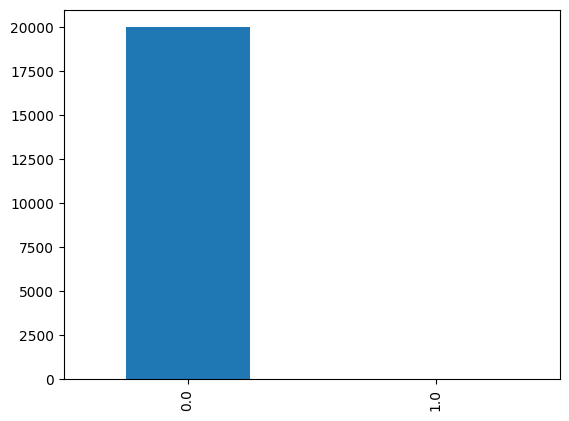

In [ ]:
df2 = df1.sample(n=20000)
df2.isFraud.value_counts().plot.bar()
print(df2.isFraud.value_counts())

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df2.drop(['isFraud'],axis=1), df2['isFraud'], test_size=0.3
, random_state=0)
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))


Before OverSampling, counts of label '1': 9
Before OverSampling, counts of label '0': 13991 



In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential

# Determine the number of samples in the minority class
num_minority_samples = sum(y_train == 1)  # Replace 1 with the label of your minority class

# Choose a value for n_neighbors (e.g., half the number of minority samples)
n_neighbors = num_minority_samples // 2

# Resample the training data using SMOTE with the adjusted n_neighbors value
sm = SMOTE(random_state=10, sampling_strategy=1.0, k_neighbors=n_neighbors)
x_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# Print the shape and class distribution after resampling
print('After OverSampling, the shape of train_X: {}'.format(x_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

# Feature scaling
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train_res)
x_test_scaled = sc.transform(X_test)

# Initializing the model (assuming you'll continue building your neural network)
model = Sequential()


After OverSampling, the shape of train_X: (27982, 11)
After OverSampling, the shape of train_y: (27982,) 

After OverSampling, counts of label '1': 13991
After OverSampling, counts of label '0': 13991


In [ ]:
' Adding the input layer and the first hidden layer '''
model.add(Dense(6, activation = 'relu'))

In [ ]:
''' Adding the second hidden layer '''
26
model.add(Dense(6, activation = 'relu'))

In [ ]:
''' Adding the output layer '''
model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
''' Compiling and fitting the model '''
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model_info = model.fit(x_train_scaled, y_train_res, batch_size = 10, epochs = 10)

Epoch 1/10
2799/2799 [==============================] - 6s 2ms/step - loss: 0.1680 - accuracy: 0.9504
Epoch 2/10
2799/2799 [==============================] - 8s 3ms/step - loss: 0.0427 - accuracy: 0.9858
Epoch 3/10
2799/2799 [==============================] - 11s 4ms/step - loss: 0.0271 - accuracy: 0.9913
Epoch 4/10
2799/2799 [==============================] - 5s 2ms/step - loss: 0.0203 - accuracy: 0.9934
Epoch 5/10
2799/2799 [==============================] - 5s 2ms/step - loss: 0.0163 - accuracy: 0.9947
Epoch 6/10
2799/2799 [==============================] - 5s 2ms/step - loss: 0.0135 - accuracy: 0.9960
Epoch 7/10
2799/2799 [==============================] - 5s 2ms/step - loss: 0.0113 - accuracy: 0.9966
Epoch 8/10
2799/2799 [==============================] - 6s 2ms/step - loss: 0.0100 - accuracy: 0.9970
Epoch 9/10
2799/2799 [==============================] - 5s 2ms/step - loss: 0.0088 - accuracy: 0.9973
Epoch 10/10
2799/2799 [==============================] - 6s 2ms/step - loss: 0.00

In [ ]:
''' Plotting the training curves '''
def plot_model_history(model_history):
  fig, axs = plt.subplots(1,2,figsize=(15,5))

In [ ]:
from tensorflow.keras.utils import to_categorical

# Convert binary labels to one-hot encoded format
y_train = to_categorical(y_train, num_classes=2)
y_val = to_categorical(y_val, num_classes=2)


In [ ]:
# Add the output layer with two units (one for each class) and softmax activation
model.add(Dense(2, activation='softmax'))


In [ ]:
import matplotlib.pyplot as plt

# Define a function to plot the training curves
def plot_model_history(model_history):
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))

    # Plot history for accuracy
    axs[0].plot(range(1, len(model_history.history['accuracy']) + 1), model_history.history['accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1, len(model_history.history['accuracy']) + 1), len(model_history.history['accuracy']) / 10)
    axs[0].legend(['train'], loc='best')

    # You can also add code to plot other metrics or losses if needed

    plt.show()

# Usage: Call the function and pass the model history as an argument
# For example, plot_model_history(history)


In [ ]:
import matplotlib.pyplot as plt

# Define a function to plot the training curves
def plot_model_history(model_history):
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))

    # Plot history for accuracy
    axs[0].plot(range(1, len(model_history.history['accuracy']) + 1), model_history.history['accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1, len(model_history.history['accuracy']) + 1), len(model_history.history['accuracy']) / 10)
    axs[0].legend(['train'], loc='best')

    # Plot history for loss
    axs[1].plot(range(1, len(model_history.history['loss']) + 1), model_history.history['loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1, len(model_history.history['loss']) + 1), len(model_history.history['loss']) / 10)
    axs[1].legend(['loss'], loc='best')

    plt.show()

# Usage: Call the function and pass the model history as an argument
# For example, plot_model_history(history)


In [ ]:
#y_pred = model.predict(x_test_scaled)
y_pred = (model.predict(x_test_scaled) > 0.5).astype("int32")
acc = accuracy_score(y_test,y_pred)*100
print('Accuracy:',round(acc,2))
27
''' Generating the Confusion matrix and Classification report'''
print('Confusion matrix', '\n', confusion_matrix(y_test, y_pred), '\n')
print('Classification report', '\n', classification_report(y_test, y_pred), '\n')

188/188 [==============================] - 1s 2ms/step
Accuracy: 98.42
Confusion matrix 
 [[5899   94]
 [   1    6]] 

Classification report 
               precision    recall  f1-score   support

         0.0       1.00      0.98      0.99      5993
         1.0       0.06      0.86      0.11         7

    accuracy                           0.98      6000
   macro avg       0.53      0.92      0.55      6000
weighted avg       1.00      0.98      0.99      6000
 

